# Library

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import geopandas as gpd
import numpy as np

from fuzzywuzzy import process
from fuzzywuzzy import fuzz

pd.set_option("display.precision", 3)

# Load data

In [2]:
df = pd.read_csv('../data/2022-03-27-clean.csv')
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,USA,8.162e+07,628.0,1.003e+06,3.0,6.427e+07,NaN,1.635e+07,2307.0,244102.0,3001.0,9.783e+08,2.926e+06,3.344e+08,North America
1,India,4.302e+07,NaN,5.210e+05,NaN,4.248e+07,NaN,1.616e+04,8944.0,30652.0,371.0,7.869e+08,5.607e+05,1.403e+09,Asia
2,Brazil,2.983e+07,NaN,6.588e+05,NaN,2.846e+07,NaN,7.089e+05,8318.0,138644.0,3062.0,6.378e+07,2.964e+05,2.152e+08,South America
3,France,2.492e+07,NaN,1.416e+05,NaN,2.292e+07,NaN,1.862e+06,1564.0,380314.0,2162.0,2.541e+08,3.878e+06,6.552e+07,Europe
4,UK,2.069e+07,NaN,1.645e+05,NaN,1.878e+07,NaN,1.743e+06,302.0,302049.0,2401.0,5.007e+08,7.309e+06,6.850e+07,Europe


# Z-score

In [3]:
def z_score(x):
    return (x-x.mean())/x.std()

# Top 10 Countries With The Most Covid-19 Cases 

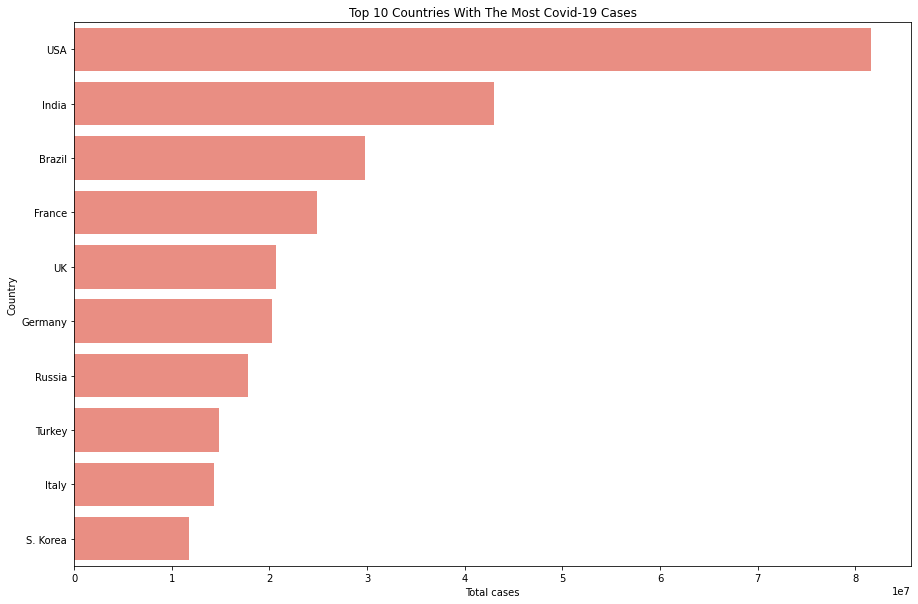

In [4]:
top10_total_index = df['TotalCases'].values.argsort()[::-1]
top10_total = df.iloc[top10_total_index[:10]]

plt.figure(figsize=(15,10))
sns.barplot(data=top10_total,x='TotalCases',y='Country,Other',color="salmon")
plt.title("Top 10 Countries With The Most Covid-19 Cases")
plt.ylabel("Country")
plt.xlabel("Total cases")

plt.savefig('../img/fig1.png')
plt.show()

# Top 10 Countries With The Highest Population-to-Case Ratio

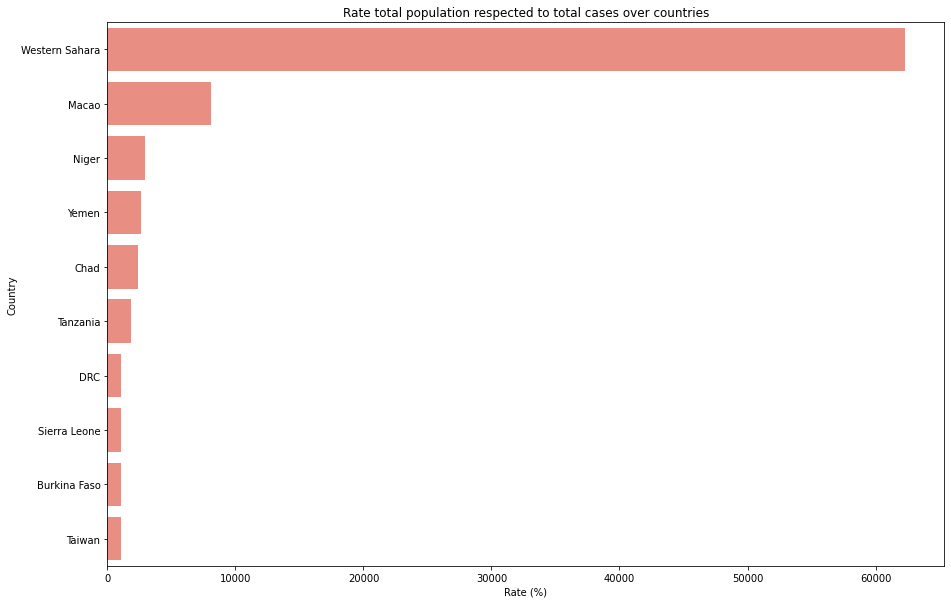

In [5]:
df_rate_case_pop = df['Population']/df['TotalCases'] 
index = df_rate_case_pop.argsort()[::-1][:10]
top10_rate_case_pop = df.iloc[index]
top10_rate_case_pop['Rate'] = df_rate_case_pop[index]

plt.figure(figsize=(15,10))
sns.barplot(data=top10_rate_case_pop,y='Country,Other',x='Rate', color="salmon")
plt.xlabel("Rate (%)")
plt.ylabel("Country")
plt.title("Rate total population respected to total cases over countries")
plt.savefig("../img/fig2.png")
plt.show()

# Create dataframe by groupping by continent

In [6]:
df_continent = df.groupby("Continent").sum()
df_continent = df_continent.reset_index()
df_continent.head()

,Continent,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
0,Africa,1.169e+07,151.0,2.524e+05,7.0,9.836e+06,296.0,4.989e+05,1422.0,1.748e+06,17784.0,9.865e+07,9.944e+06,1.396e+09
1,Asia,1.369e+08,501310.0,1.393e+06,970.0,1.165e+08,286188.0,6.092e+06,26763.0,4.874e+06,30539.0,1.840e+09,7.783e+07,3.219e+09
2,Australia/Oceania,5.143e+06,57039.0,8.703e+03,17.0,4.431e+06,14786.0,6.328e+05,139.0,1.266e+06,5884.0,7.403e+07,1.073e+07,4.325e+07
3,Europe,1.755e+08,222452.0,1.764e+06,751.0,1.474e+08,303125.0,1.655e+07,10789.0,1.431e+07,109278.0,2.567e+09,1.896e+08,7.484e+08
4,North America,9.634e+07,4396.0,1.438e+06,104.0,7.731e+07,3558.0,1.758e+07,7931.0,6.090e+06,49475.0,1.094e+09,8.363e+07,5.970e+08


# Comparing The Number Of Covid-19 Cases Between Continents

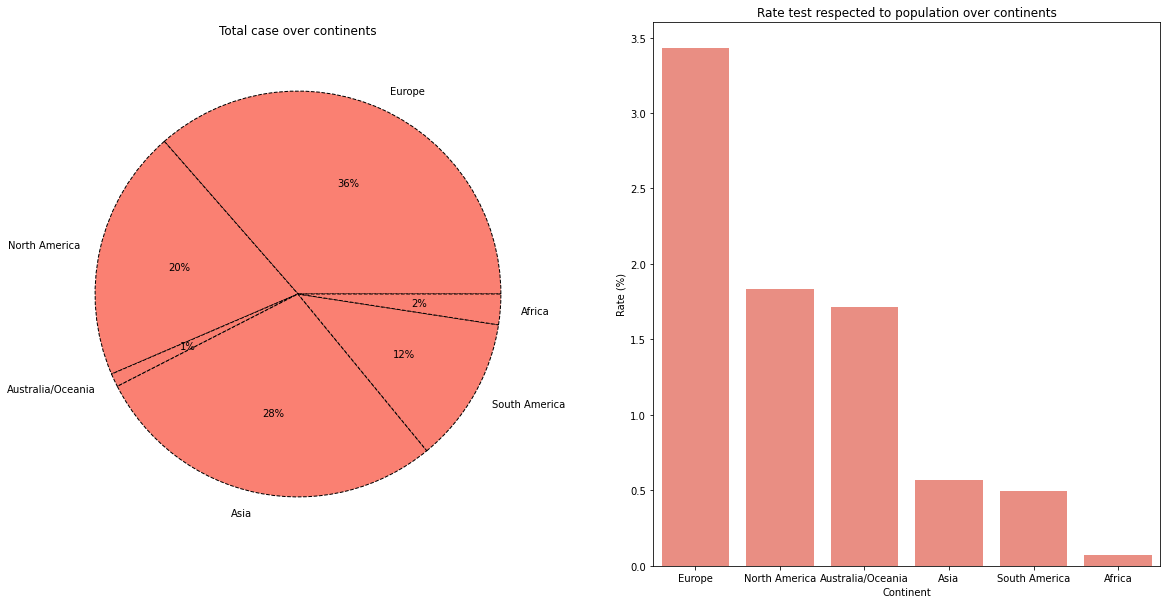

In [7]:
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1,2,figsize=(20,10))

rate_test_pop_continent = df_continent['TotalTests']/df_continent['Population']
index = rate_test_pop_continent.values.argsort()[::-1]
df_rate_test_pop_continent = df_continent.iloc[index]
df_rate_test_pop_continent['Test/pop'] = rate_test_pop_continent[index]

ax[0].pie(x=df_rate_test_pop_continent['TotalCases'],
            labels=df_rate_test_pop_continent['Continent'],
            autopct='%.0f%%',
            wedgeprops = {'edgecolor':'k', 'linestyle': 'dashed'},
            colors=len(df_rate_test_pop_continent['TotalCases'])*["salmon"])
ax[0].set_title("Total case over continents")

sns.barplot(ax=ax[1],y=df_rate_test_pop_continent['Test/pop'],x=df_rate_test_pop_continent['Continent'],color="salmon")
ax[1].set_title("Rate test respected to population over continents")
ax[1].set_xlabel("Continent")
ax[1].set_ylabel("Rate (%)")

plt.savefig('../img/fig3.png')
plt.show()

# Pairplot for checking relationship

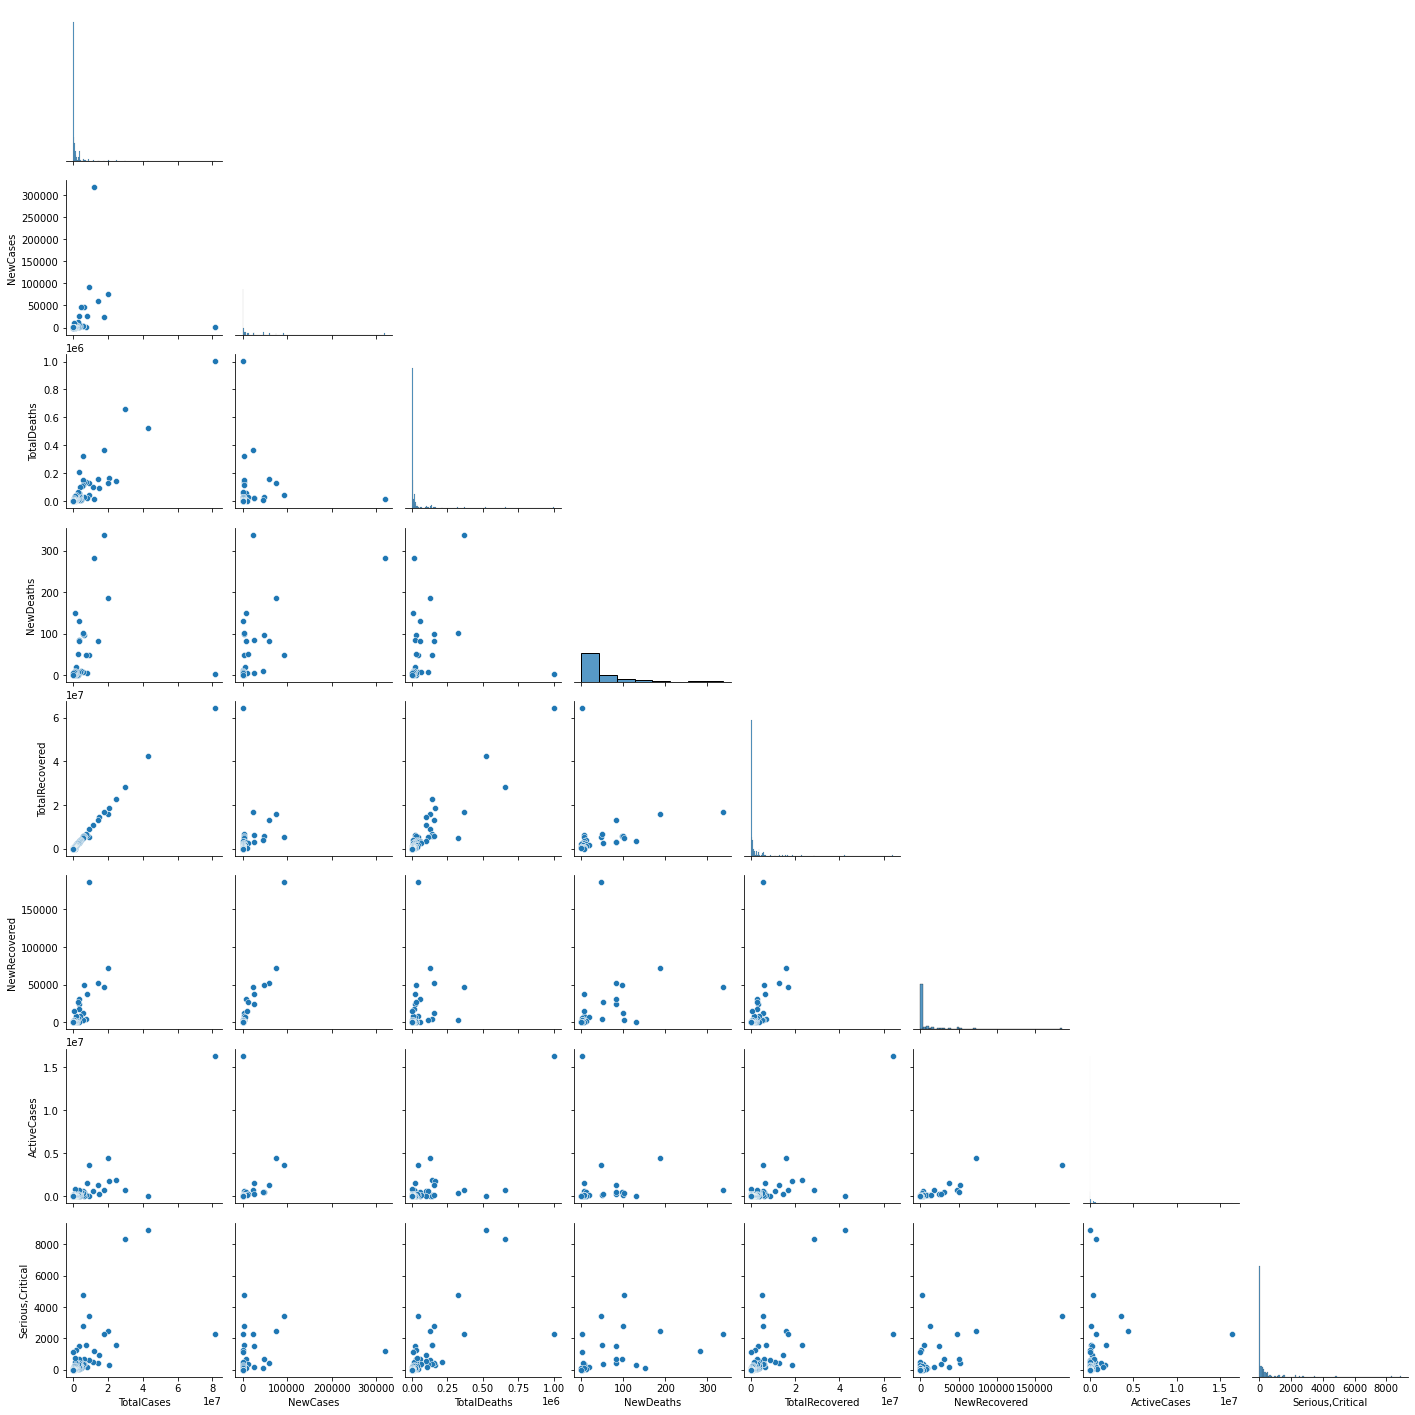

In [8]:
sns.pairplot(data=df,vars=['TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases','Serious,Critical'],corner=True)
plt.show()

# Pearson's correlation

In [9]:
corr = df.corr()
corr.style.background_gradient()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
TotalCases,1.000,0.182,0.919,0.182,0.994,0.638,0.827,0.630,0.118,0.208,0.894,0.058,0.605
NewCases,0.182,1.000,0.010,0.584,0.227,0.924,0.253,0.260,0.091,-0.117,0.043,-0.048,0.096
TotalDeaths,0.919,0.010,1.000,0.201,0.933,0.270,0.718,0.733,0.027,0.283,0.776,-0.010,0.594
NewDeaths,0.182,0.584,0.201,1.000,0.223,0.364,0.050,0.440,-0.177,-0.125,0.113,-0.113,0.298
TotalRecovered,0.994,0.227,0.933,0.223,1.000,0.558,0.762,0.675,0.114,0.224,0.904,0.066,0.656
NewRecovered,0.638,0.924,0.270,0.364,0.558,1.000,0.845,0.536,0.070,0.007,0.498,0.014,0.267
ActiveCases,0.827,0.253,0.718,0.050,0.762,0.845,1.000,0.251,0.112,0.155,0.692,0.050,0.220
"Serious,Critical",0.630,0.260,0.733,0.440,0.675,0.536,0.251,1.000,-0.101,0.083,0.509,-0.090,0.761
Tot Cases/1M pop,0.118,0.091,0.027,-0.177,0.114,0.070,0.112,-0.101,1.000,0.496,0.114,0.615,-0.124
Deaths/1M pop,0.208,-0.117,0.283,-0.125,0.224,0.007,0.155,0.083,0.496,1.000,0.148,0.172,-0.046


# Heatmap of correlation

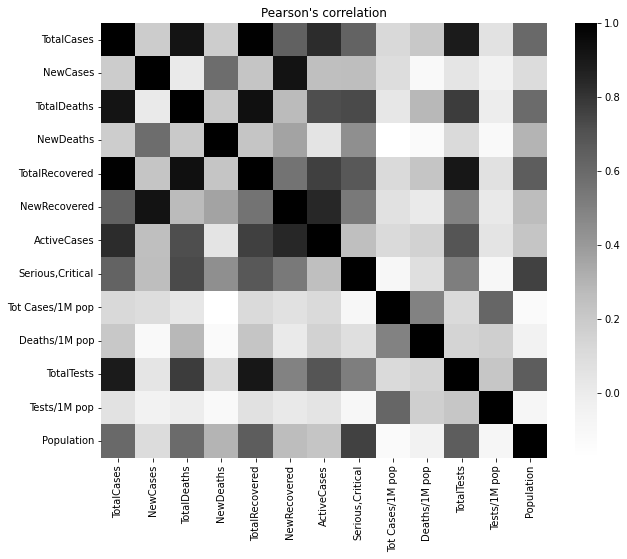

In [10]:
plt.figure(figsize=(10,8))
plt.title("Pearson's correlation")
sns.heatmap(corr,cmap='Greys')
plt.show()

# Sorting correlation of total case

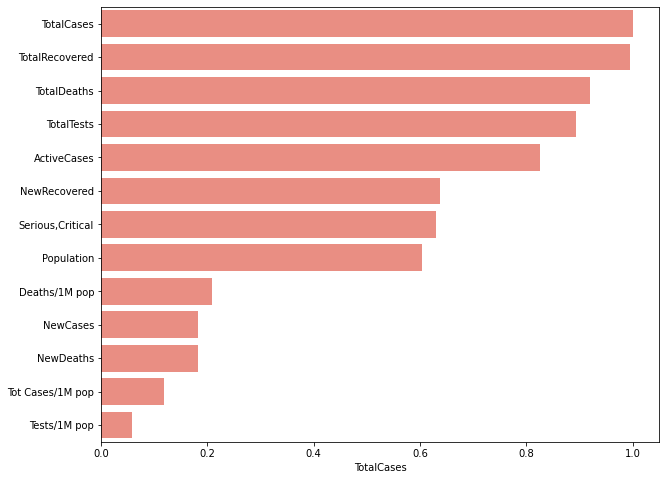

In [11]:
corr_total_cases = corr['TotalCases']
corr_total_cases = corr_total_cases.sort_values()[::-1]

plt.figure(figsize=(10,8))
sns.barplot(y=corr_total_cases.index,x=corr_total_cases,color='salmon')
plt.show()

# Death-to-case ratio between countries

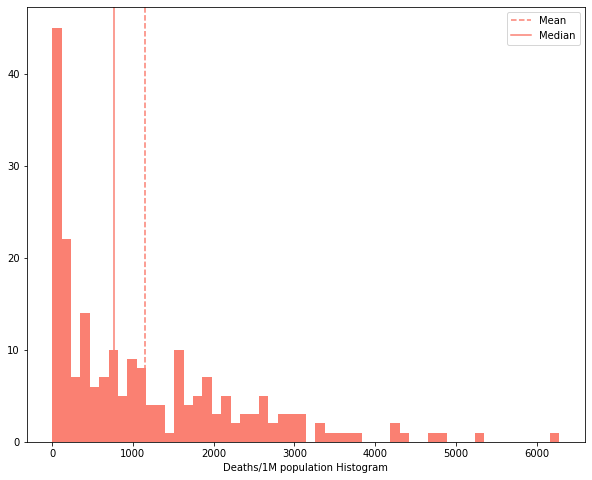

In [12]:
mean = df['Deaths/1M pop'].mean()
median = df['Deaths/1M pop'].median() 

plt.figure(figsize=(10,8))
plt.hist(df['Deaths/1M pop'],bins = len(df)//4, color='salmon')

plt.axvline(mean, color='salmon', linestyle='--', label="Mean")
plt.axvline(median, color='salmon', linestyle='-', label="Median")

plt.legend()
plt.xlabel('Deaths/1M population Histogram')
plt.savefig('../img/fig4.png')
plt.show()

# Relationship log-log of death and serious 

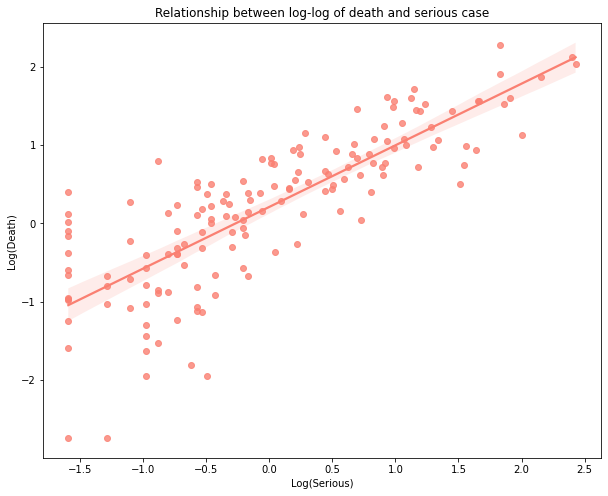

In [13]:
df['Serious_Log_Std'] = z_score(np.log(df['Serious,Critical']))
df['TotalDeaths_Log_Std'] = z_score(np.log(df['TotalDeaths']))

plt.figure(figsize=(10,8))

sns.regplot(data=df,x='Serious_Log_Std',y='TotalDeaths_Log_Std',color='salmon')
plt.xlabel("Log(Serious)")
plt.ylabel("Log(Death)")
plt.title("Relationship between log-log of death and serious case")

plt.savefig("../img/fig5.png")
plt.show()

In [14]:
result = smf.ols(' Q("TotalDeaths_Log_Std") ~ Q("Serious_Log_Std")',data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Q("TotalDeaths_Log_Std")   R-squared:                       0.661
Model:                                  OLS   Adj. R-squared:                  0.658
Method:                       Least Squares   F-statistic:                     299.7
Date:                      Sun, 27 Mar 2022   Prob (F-statistic):           5.84e-38
Time:                              17:36:06   Log-Likelihood:                -131.72
No. Observations:                       156   AIC:                             267.4
Df Residuals:                           154   BIC:                             273.5
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2106      0.045      4.643      0.000       0.121       0.300
Q("Serious_Log_Std")     0.7878      0.046     17.311      0.000       0.698       0.878
==============================================================================
Omnibus:                       16.745   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.383
Skew:                          -0.663   Prob(JB):                     2.27e-05
Kurtosis:                       4.237   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Dead and recovery rate

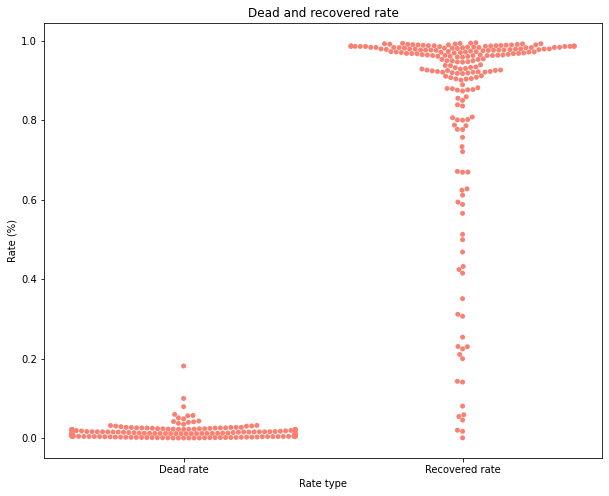

In [15]:
df_rate = pd.DataFrame(df['Country,Other'])
df_rate['Dead rate'] = df['TotalDeaths'] / df['TotalCases'] 
df_rate['Recovered rate'] = df['TotalRecovered'] / df['TotalCases'] 

plt.figure(figsize=(10,8))
df_rate = df_rate.melt('Country,Other',var_name='Rate type', value_name='Rate (%)')
sns.swarmplot(data=df_rate,y='Rate (%)',x='Rate type',color='salmon')
plt.title("Dead and recovered rate")
plt.savefig('../img/fig6.png')
plt.show()

In [16]:
df['TotalCases_Std'] = z_score(df['TotalCases'])
df['TotalDeaths_Std'] = z_score(df['TotalDeaths'])
df['TotalRecovered_Std'] = z_score(df['TotalRecovered'])

result = smf.ols('TotalCases_Std ~ TotalRecovered_Std + TotalDeaths_Std',data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TotalCases_Std   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8650.
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          6.79e-192
Time:                        17:36:07   Log-Likelihood:                 156.92
No. Observations:                 199   AIC:                            -307.8
Df Residuals:                     196   BIC:                            -298.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0030      0.008      0.379      0.705      -0.013       0.018
TotalRecovered_Std     1.0025      0.022     46.381      0.000       0.960       1.045
TotalDeaths_Std        0.0230      0.021      1.076      0.283      -0.019       0.065
==============================================================================
Omnibus:                      117.130   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17651.602
Skew:                           1.056   Prob(JB):                         0.00
Kurtosis:                      49.091   Cond. No.                         5.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Total test less than total cases

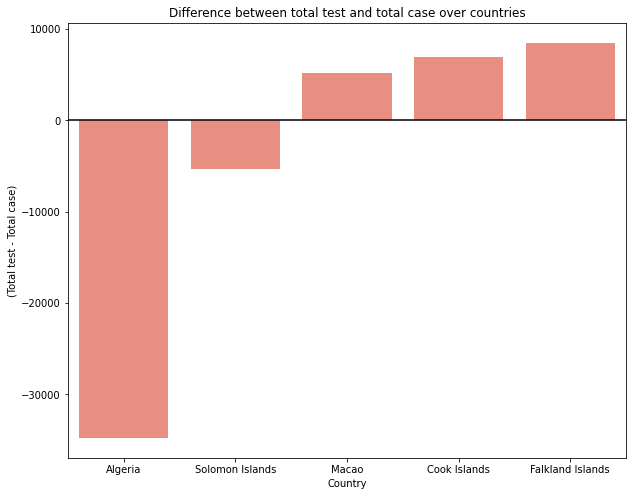

In [17]:
plt.figure(figsize=(10,8))

df_delta_test_total = df
df_delta_test_total['Delta'] = df['TotalTests']-df['TotalCases']
df_delta_test_total = df_delta_test_total.sort_values(by='Delta',ascending=True)[:5]

ax = sns.barplot(data=df_delta_test_total,x='Country,Other',y='Delta',color='salmon')
ax.axhline(0,color='black')

plt.xlabel("Country")
plt.ylabel("(Total test - Total case)")
plt.title("Difference between total test and total case over countries")
plt.savefig("../img/fig7.png")
plt.show()

# Define world map

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8.374e+03,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,1.506e+05,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,9.065e+02,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1.674e+06,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,1.856e+07,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


# Cases on map over countries

In [19]:
countries = df['Country,Other']

def fuzzy_match(findStr, listAC, nElement=1):
    matches = process.extract(findStr, listAC, limit=nElement, scorer = fuzz.token_sort_ratio)
    return matches

for i, country in enumerate(countries):
    candidates = fuzzy_match(country,world['name'],1)
    if (candidates[0][1]<100 and candidates[0][1]>75):
        print(country,candidates)
        countries[i] = candidates[0][0]

countries.replace("USA","United States of America",inplace=True)
countries.replace("UAE","United Arab Emirates",inplace=True)
countries.replace("UK","United Kingdom",inplace=True)

df['Country'] = countries
df['Rate_case'] = df['Population']/df['TotalCases'] 
world_country = world.merge(df,how='left',left_on='name',right_on='Country')

S. Korea [('South Korea', 78, 96)]
Dominican Republic [('Dominican Rep.', 84, 17)]
Bosnia and Herzegovina [('Bosnia and Herz.', 81, 170)]
South Sudan [('S. Sudan', 78, 176)]
Dominica [('Dominican Rep.', 76, 17)]
Solomon Islands [('Solomon Is.', 80, 135)]
Falkland Islands [('Falkland Is.', 81, 20)]


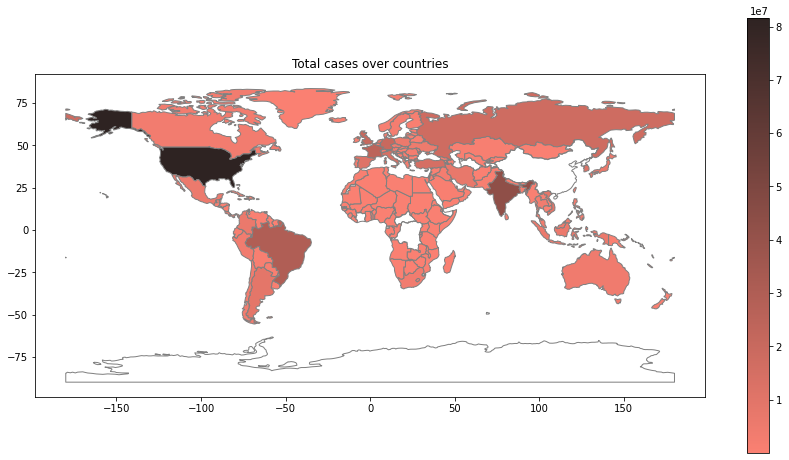

In [20]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
world_country.plot(column='TotalCases',ax=ax,legend=True,cmap=sns.color_palette("dark:salmon_r", as_cmap=True),edgecolors='grey')
plt.title("Total cases over countries")
plt.savefig("../img/fig8.png")
plt.show()